<center>Universidade Federal de Viçosa</center>
<center>Coordenadoria de Educação Aberta e a Distância</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT579 - Topicos Especiais em Inteligencia Artificial</center>

**<center>AULA PRÁTICA 1: Comandos Básicos para Pre-processamento de Texto</center>**

_<center>Processamento de Linguagem Natural</center>_

# AULA PRÁTICA 1: Comandos Básicos para Pre-processamento de Texto

## 1 Introdução ao Pré-processamento de Texto

O pré-processamento de texto é uma etapa fundamental no processamento de linguagem natural (NLP), pois transforma textos brutos em um formato adequado para análise e modelagem. Como os dados textuais costumam ser desorganizados e conter ruídos (ex.: pontuação, caracteres especiais), o pré-processamento ajuda a limpar e estruturar essas informações, o que melhora o desempenho dos algoritmos de NLP.

As etapas mais comuns incluem:

1.   **Tokenização**: Dividir o texto em unidades menores (palavras ou frases).
2.   **Remoção de Stopwords**: Eliminar palavras de pouca relevância (ex.: "o", "de").
3.   **Stemming**: Reduzir palavras à sua forma base, retirando sufixos (ex.: "jogando" para "jog").
4.   **Lematização**: Reduzir palavras à sua forma canônica ou raiz (ex.: "jogando" para "jogar").

Essas etapas ajudam a reduzir a dimensionalidade dos dados e a melhorar a representatividade do texto nos modelos.

## 2 Instalação e Importação das Bibliotecas Necessárias

In [ ]:
#!pip install nltk

**Notes**:

`nltk`: Biblioteca para processamento de linguagem natural (NLP), com funções como stopwords e PorterStemmer para remoção de palavras irrelevantes e stemming.

## 3 Criar conjunto de dados


{ Um DataFrame é criado com mensagens de texto e suas respectivas classificações (Label), onde 1 é positivo e 0 é negativo }
*   **Importação da biblioteca Pandas:** O Pandas é importado com o apelido pd, que é a convenção comum. Ele será usado para criar e manipular dataframes, que são estruturas de dados tabulares, similares a tabelas de banco de dados ou planilhas de Excel.
*   **Criação de um conjunto de dados:** O conjunto de dados é um dicionário chamado `data`.

1.   `Message`: Contém uma lista de mensagens de texto, que são frases sobre aprendizado de máquina e processamento de linguagem natural.
2.   `Label`: Contém uma lista de números (1 e 0). Cada número corresponde a uma classificação de sentimento fictícia (ex.: 1 pode representar uma mensagem positiva, e 0, uma negativa).

*   **Criação de um DataFrame com Pandas:** A função `pd.DataFrame()` transforma o dicionário data em um DataFrame do Pandas. Um DataFrame é uma tabela onde as colunas são as chaves do dicionário ('Message' e 'Label') e as linhas são os dados.
*   **Exibição do DataFrame:** A função `display()` mostra o conteúdo do DataFrame de forma mais organizada e legível (comum em ambientes como Jupyter Notebooks ou Google Colab).

In [ ]:
import pandas as pd

# Exemplo de conjunto de dados
data = {
    'Message': [
        'I love machine learning!',
        'Deep learning is amazing.',
        'Natural Language Processing is a subset of AI.',
        'How to build a neural network?',
        'Machine learning models are powerful.'
    ],
    'Label': [1, 1, 0, 0, 1]  # 1 para positivo, 0 para negativo (exemplo fictício)
}

df = pd.DataFrame(data)
display(df)

,Message,Label
0,I love machine learning!,1
1,Deep learning is amazing.,1
2,Natural Language Processing is a subset of AI.,0
3,How to build a neural network?,0
4,Machine learning models are powerful.,1


## 4 Adicionar ruído a um texto

Através da inclusão de palavras aleatórias e pela introdução de erros de digitação. Isso pode ser útil para simular dados ruidosos em tarefas de processamento de linguagem natural (NLP), testando a robustez de algoritmos

*   **Importação de bibliotecas:**
  
  `Numpy`: Importado como np, é usado para gerar números aleatórios. A função `np.random.randint` é utilizada para escolher índices aleatórios em listas.
  `Random`: A biblioteca random fornece a função `random.choice`, que permite selecionar elementos aleatórios de uma lista ou caracteres de uma string.

*   **Função add_noise:** A função `add_noise` adiciona ruído a um texto. Ela divide o texto em palavras e altera algumas de duas maneiras: substituindo por palavras aleatórias e criando erros de digitação.

*   **Processo de adicionar ruído:** O texto é dividido em palavras usando `split()`, criando uma lista chamada `words`. O número de palavras a serem afetadas pelo ruído é calculado multiplicando o total de palavras pelo nível de ruído definido.

*   **Adição de palavras aleatórias:** Uma lista de palavras de ruído é usada para substituir algumas palavras originais. Para cada palavra a ser modificada, um índice aleatório da lista de palavras é escolhido, e a palavra é substituída por uma das palavras de ruído aleatórias. {o `random.choice` substitui palavras ou caracteres por elementos aleatorios}

*   **Adição de erros de digitação:** Além das palavras aleatórias, a função também introduz erros de digitação em algumas palavras, substituindo um caractere aleatório por outro. Isso simula erros comuns de digitação, como letras incorretas ou trocadas.

In [ ]:
import numpy as np
import random

# Função para adicionar ruído ao texto
## Parametros:
##   text: O texto original que receberá o ruído.
##   noise_level: A porcentagem de palavras que será modificada, com o valor padrão de 10% (0.1).
def add_noise(text, noise_level=0.1):
    words = text.split()
    num_noisy_words = int(len(words) * noise_level)

    # Adicionando palavras aleatórias como ruído
    noisy_words = ['abc', 'xyz', '123', 'noise']
    for _ in range(num_noisy_words):
        idx = np.random.randint(len(words))
        words[idx] = random.choice(noisy_words)  # Alteração para usar random.choice

    # Adicionando erros de digitação
    for _ in range(num_noisy_words):
        idx = np.random.randint(len(words))
        if len(words[idx]) > 2:
            pos = np.random.randint(len(words[idx]))
            # Substituindo caractere por um caractere aleatório
            words[idx] = words[idx][:pos] + random.choice('abcdefghijklmnopqrstuvwxyz') + words[idx][pos+1:]

    return ' '.join(words)

# Adicionando ruído ao conjunto de dados
df['Noisy_Message'] = df['Message'].apply(lambda x: add_noise(x, noise_level=0.20)) #pode alterar o noise_level

# Exibindo o DataFrame com ruído adicionado
print("\nDataFrame com Ruído Adicionado:")
display(df[['Noisy_Message']])


DataFrame com Ruído Adicionado:


,Noisy_Message
0,I love machine learning!
1,Deep learning is amazing.
2,Natural Language xyz is a subset of AI.
3,How to build a xyz nevwork?
4,Machine 123 models mre powerful.


## 5 Etapas de Pré-processamento

*   **Importação de Bibliotecas**:

  `re`: Biblioteca para operações de expressões regulares, usada para limpar o texto.

  `pandas`: Biblioteca para manipulação de dados em forma de tabelas (DataFrames).

  `nltk`: Biblioteca para processamento de linguagem natural (NLP).

  `stopwords, wordnet`: Componentes do NLTK para remoção de stopwords e lematização.
  
  `PorterStemmer, WordNetLemmatizer`: Ferramentas do NLTK para stemming e lematização, respectivamente.

*   **Baixando Recursos Adicionais do NLTK**:

  `nltk.download('stopwords')`: Baixa a lista de stopwords.
  
  `nltk.download('punkt')`: Baixa recursos para tokenização.

  `nltk.download('averaged_perceptron_tagger')`: Baixa o tagger POS (Part-of-Speech) para identificação de partes do discurso.

  `nltk.download('wordnet')`: Baixa o dicionário WordNet para lematização.


*   **Inicializando o Stemmer e o Lemmatizer**:

  stemmer = `PorterStemmer()`: Cria uma instância do stemmer de Porter para reduzir palavras às suas raízes.

  lemmatizer = `WordNetLemmatizer()`: Cria uma instância do lemmatizer baseado no WordNet para reduzir palavras às suas formas base.

*   **Função `preprocess_text`**: Convertendo para Minúsculas, Removendo URLs, Removendo Caracteres Não-Alfanuméricos, Removendo Números, Tokenização, Remoção de Stopwords, Stemming, Juntando Tokens.

*   **Função `get_wordnet_pos`**: Conversão de Tags POS: Converte tags de partes do discurso (POS) para o formato do WordNet (ADJ, NOUN, VERB, ADV). Usa a tagger POS do NLTK para identificar a parte do discurso de uma palavra.

*   **Função `lemmatize_with_pos`**: Lematização com Tags POS: Lematiza tokens usando o lemmatizer do WordNet e adiciona as tags POS para cada token. Retorna uma lista de tuplas contendo o token original, o lema e a tag POS.

*   **Aplicação do Pré-processamento ao DataFrame**:

  `df['Processed_Message'] = df['Noisy_Message'].apply(preprocess_text)`: Aplica a função de pré-processamento aos textos na coluna 'Noisy_Message' e armazena o resultado na coluna `Processed_Message`.

*   **Aplicação da Lematização com Tags POS ao DataFrame**:

  `df['lemmatized_with_pos'] = df['Noisy_Message'].apply(lambda text: lemmatize_with_pos(text.split())):` Aplica a lematização com tags POS aos textos na coluna 'Noisy_Message' e armazena o resultado na coluna `lemmatized_with_pos`.

In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Baixando recursos adicionais do nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Inicializando o stemmer e o lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Função para pré-processar o texto
def preprocess_text(text):
    # Convertendo para minúsculas
    text = text.lower()

    # Removendo URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removendo caracteres não-alfanuméricos
    text = re.sub(r'\W', ' ', text)

    # Removendo números
    text = re.sub(r'\d', '', text)

    # Tokenização
    tokens = text.split()

    # Remoção de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Juntando tokens de volta em uma string
    text = ' '.join(tokens)

    return text

# Função para lematizar tokens com tags POS
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_with_pos(tokens):
    # Lematiza tokens com tags POS
    lemmas_with_pos = [(token, lemmatizer.lemmatize(token, get_wordnet_pos(token)), nltk.pos_tag([token])[0][1]) for token in tokens]
    return lemmas_with_pos

# Aplicando o pré-processamento ao DataFrame
df['Processed_Message'] = df['Noisy_Message'].apply(preprocess_text)

# Aplicando a lematização com tags POS ao DataFrame
df['lemmatized_with_pos'] = df['Noisy_Message'].apply(lambda text: lemmatize_with_pos(text.split()))

# Exibindo os resultados
#display(df[['Message']])
#display(df[['Noisy_Message']])
display(df[['Processed_Message']]) #Exibe a coluna com os textos processados.
print(df[['lemmatized_with_pos']]) #Imprime a coluna com as palavras originais, os lemas e suas tags POS.

#######TEM ALGO ERRADO?##########

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Message
0,I love machine learning!
1,Deep learning is amazing.
2,Natural Language Processing is a subset of AI.
3,How to build a neural network?
4,Machine learning models are powerful.


,Noisy_Message
0,I love machine learning!
1,Deep learning is amazing.
2,Natural Language xyz is a subset of AI.
3,How to build a xyz nevwork?
4,Machine 123 models mre powerful.


,Processed_Message
0,love machin learn
1,deep learn amaz
2,natur languag xyz subset ai
3,build xyz nevwork
4,machin model mre power


                                 lemmatized_with_pos
0  [(I, I, PRP), (love, love, NN), (machine, mach...
1  [(Deep, Deep, JJ), (learning, learn, VBG), (is...
2  [(Natural, Natural, JJ), (Language, Language, ...
3  [(How, How, WRB), (to, to, TO), (build, build,...
4  [(Machine, Machine, NN), (123, 123, CD), (mode...


**notes**:

**Lematização**: Reduz as palavras à sua forma canônica (como "running" para "run").

- ! tem a lematização que mostra o retorno da palavra a sua raiz

- ! eu pedi pra remover numeros e no final {linha 4} me veio numeros; isso aconteceu na parta aplicando a lematização com tags pos ao dataframe com df que nao estava processed message como deveria.

- `WordNetLemmatizer`: Ferramenta de lematização.
- A função get_wordnet_pos mapeia os part-of-speech tags para os tipos gramaticais usados no WordNet (adj, noun, verb, adv).
- Aplica a lematização aos tokens de cada mensagem ruidosa.

## 6 Vetorização de Texto

Vetorização é o processo de transformar texto em uma representação numérica que pode ser utilizada por algoritmos de aprendizado de máquina.

Utilizando o `CountVectorizer` da biblioteca *scikit-learn*. {ela cria uma matriz onde as linhas são documentos e as colunas são palavras. Os valores são o número de ocorrências da palavra.}

In [ ]:
# Vetorização do texto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Message'])
y = df['Label']

# Exibindo a matriz de características X
print("\nMatriz de Características (X):")
print(X.toarray())

# Exibindo os nomes das características
print("\nNomes das Características:")
print(vectorizer.get_feature_names_out())



Matriz de Características (X):
[[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 1 1 1 0 0 1 0 0]]

Nomes das Características:
['ai' 'amaz' 'build' 'deep' 'languag' 'learn' 'love' 'machin' 'model'
 'mre' 'natur' 'nevwork' 'power' 'subset' 'xyz']


**notes**:
- `X.toarray()`: Converte a matriz esparsa resultante da vetorização para um array denso, permitindo visualização completa.
- `vectorizer.get_feature_names_out()`: Exibe os nomes das características, ou seja, as palavras que compõem as colunas da matriz de características (as palavras extraídas do texto processado).

- **Objetivo**: Exibir a matriz de contagem das palavras (bag-of-words) e listar as palavras extraídas (características) do texto após o pré-processamento.

## 7 Classificação de Texto

*   **Divisão dos Dados**: Divide os dados em conjuntos de treinamento e teste

*   **Treinamento e Previsão**: Treina um classificador MLPClassifier e faz previsões sobre os dados de teste.

*   **Avaliação**: Avalia o modelo usando métricas como acurácia, relatório de classificação e matriz de confusão

*   **Visualização**: Plota a matriz de confusão para uma análise visual do desempenho do modelo.

Essas etapas fazem parte de um pipeline de classificação típico em aprendizado de máquina, que inclui a preparação dos dados, treinamento do modelo, avaliação e visualização dos resultados.

Acurácia: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


DataFrame com Mensagens Reais, Previsões e Rótulos:
                                 Message       Processed_Message  Label  \
1              Deep learning is amazing.         deep learn amaz      1   
4  Machine learning models are powerful.  machin model mre power      1   

   Predicted_Label                      Predicted_Message  
1                1              Deep learning is amazing.  
4                1  Machine learning models are powerful.  


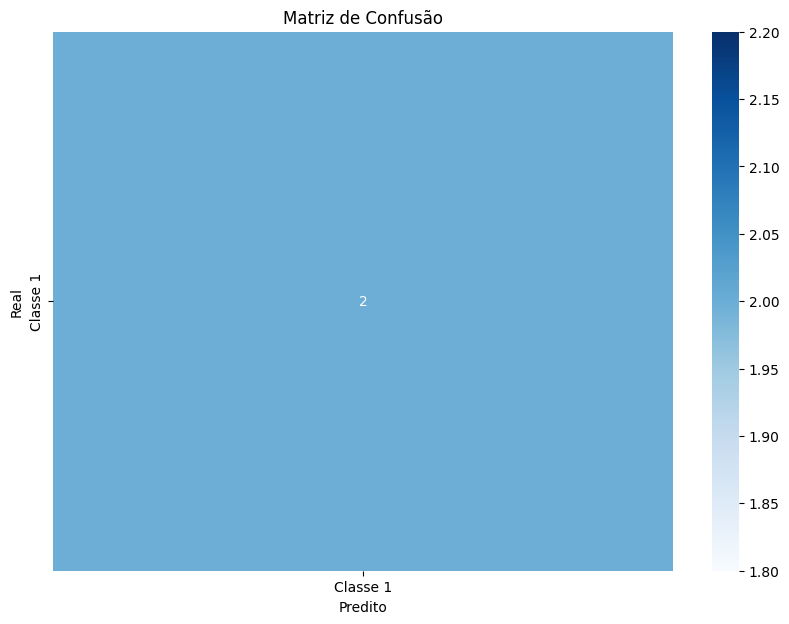

In [ ]:
# Importando bibliotecas necessárias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, df.index, test_size=0.3, random_state=42
)

# Treinando o modelo MLP
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Identificar as classes presentes no conjunto de teste
classes_present = np.unique(y_test)

# Relatório de Classificação e Matriz de Confusão
report = classification_report(y_test, y_pred, target_names=[f'Classe {c}' for c in classes_present], labels=classes_present)
conf_matrix = confusion_matrix(y_test, y_pred, labels=classes_present)

# Exibindo o relatório de classificação
print("\nRelatório de Classificação:")
print(report)

# Criar um DataFrame para o conjunto de teste
df_test = df.loc[indices_test].copy()
df_test['Predicted_Label'] = y_pred
df_test['Predicted_Message'] = df_test['Message']  # Adicionar coluna com o texto original

# Exibindo o DataFrame com mensagens reais, preditas e rótulos
print("\nDataFrame com Mensagens Reais, Previsões e Rótulos:")
print(df_test[['Message', 'Processed_Message', 'Label', 'Predicted_Label', 'Predicted_Message']])

# Visualização da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Classe {c}' for c in classes_present], yticklabels=[f'Classe {c}' for c in classes_present])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

**notes**
- default : função relu
- teve acuracia de 100%

`train_test_split`: Divide os dados em conjuntos de treino e teste, com 70% para treino e 30% para teste.

`test_size=0.3`: Define a proporção do conjunto de teste.

`random_state=42`: Garante reprodutibilidade {mantem a mesma semente aleatoria}.

`MLPClassifier`: Define uma rede neural perceptron com:

- Uma única camada oculta com 10 neurônios.
- `max_iter=500`: Número máximo de iterações para o treinamento.
- O modelo é treinado com os dados de treino e em seguida faz previsões sobre os dados de teste.

`accuracy_score`: Calcula a acurácia do modelo (percentual de acertos).

`classification_report`: Gera um relatório de desempenho com métricas como precisão, recall e f1-score para cada classe.

`target_names`: Nomeia as classes com base nos valores presentes em y_test.

`confusion_matrix`: Calcula a matriz de confusão, que mostra a relação entre previsões corretas e incorretas para cada classe.


`df_test`
- Cria um DataFrame com as amostras de teste (df_test), adicionando a previsão do modelo (Predicted_Label) e exibindo o resultado.
- As mensagens originais, ruidosas, processadas e as previsões são exibidas para comparação

## Bônus

In [ ]:
##############################################################################################################################################################################
#BONUS:

#Preenchimento e Truncamento
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample texts
texts = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Define a maximum sequence length
max_length = 10

# Perform padding or truncation
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Display the results
print("Original Sequences:")
print(sequences)
print("\nPadded/Truncated Sequences:")
print(padded_sequences)

Original Sequences:
[[1, 2, 3, 5, 4], [1, 4, 2, 3, 6, 4], [7, 1, 2, 3, 8, 9], [2, 1, 3, 5, 4]]

Padded/Truncated Sequences:
[[1 2 3 5 4 0 0 0 0 0]
 [1 4 2 3 6 4 0 0 0 0]
 [7 1 2 3 8 9 0 0 0 0]
 [2 1 3 5 4 0 0 0 0 0]]


**notes**:

**Tokenizer**: Cria um mapeamento de palavras para índices inteiros.

`texts_to_sequences`: Converte os textos em sequências de números inteiros.

`pad_sequences`: Faz o preenchimento ou truncamento das sequências para um comprimento máximo (max_length=10), adicionando zeros no final das sequências ou removendo os excessos.

Exibe as sequências originais e as sequências com padding ou truncamento.


**notes** (conclusão)

Este código implementa um pipeline completo de processamento de texto com ruído artificial, pré-processamento (remoção de stopwords, stemming, etc.), vetorização, treinamento de uma rede neural MLP para classificação, além de realizar avaliação com métricas de desempenho e trabalhar com lematização e manipulação de sequências de texto usando Keras. Cada bloco tem uma função clara e bem definida no pipeline de NLP, sendo possível usar esse modelo como base para outros tipos de tarefas de classificação de texto.

## Lemmatização

**Lemmatização**

Aqui estão algumas situações em que a lematização é particularmente útil:

**Análise de Texto e Pesquisa:**

*Consistência*: Quando você precisa comparar palavras que têm a mesma base, independentemente da sua forma. Por exemplo, "running", "ran", e "runs" serão reduzidos ao seu lema comum, "run", permitindo que eles sejam tratados como a mesma palavra durante a análise.

*Pesquisas e Relevância*: Para melhorar a relevância das buscas, garantindo que todas as variações de uma palavra sejam tratadas de forma consistente. Por exemplo, em um sistema de busca, a lematização ajuda a encontrar documentos que contenham variações de uma palavra-chave.

**Classificação de Texto:**

*Redução da Dimensionalidade*: Na construção de modelos de aprendizado de máquina, a lematização ajuda a reduzir a dimensionalidade dos dados de texto ao consolidar diferentes formas de uma palavra em uma única forma básica. Isso pode melhorar a eficiência e o desempenho dos modelos.

*Precisão do Modelo*: Ao usar lemas, você pode melhorar a precisão dos modelos de classificação, pois o modelo se concentra em menos características e menos variações da mesma palavra.

**Análise de Sentimentos e Extrair Informações:**

*Uniformidade*: A lematização ajuda a criar uma representação mais uniforme das palavras, o que pode ser crucial para análises de sentimentos e extração de informações. Isso garante que palavras com significados semelhantes sejam tratadas como equivalentes.
Pré-processamento de Dados:

*Preparação de Dados*: Antes de aplicar algoritmos de NLP, a lematização é uma etapa fundamental no pré-processamento de dados. Ela normaliza o texto para melhorar a qualidade e a eficácia das análises subsequentes.

**Informaçoes**:
- **nome do arquivo original**: ELT579_NLP_P1.ipynb
- **origem**: https://ava.ufv.br/pluginfile.php/874850/mod_resource/content/4/ELT579_NLP_P1.ipynb
- **autor**: Talita Santana / UFV
- **modificado por**: Thiago Tim
